## Clasificador Naive Bayes

##### **Ejemplo 2 : Jugar futbol según el clima** 

Suponga que desea calcular la probabilidad de jugar futbol cuando el clima está nublado y la remperatura es templada.

##### **Solución: Primer enfoque (una sola característica)**

El clasificador Naive Bayes calcula la probabilidad del evento con los siguientes pasos:

- Paso 1: Calcular la probabilidad previa para las etiquetas de clase dadas.
- Paso 2: Encuentre la probabilidad de similitud con cada atributo para cada clase.
- Paso 3: Coloque estos valores en la fórmula de Bayes y calcule la probabilidad posterior.
- Paso 4: Vea qué clase tiene la probabilidad más alta, dado que la entrada
- Pertenece a la clase de probabilidad más alta.

#### **Diccionario de datos**

| Variable    | Tipo    | Descripción                                     |
|-------------|---------|-------------------------------------------------|
| clima       | cadena  | describe el clima: soleado, nublado, lluvioso   |
| temperatura | cadena  | indica la temperatura: caliente, templado, frio |
| jugar       | cadena  | indica si se puede jugar o no                   |

- Característica: clima, temperatura
- Variable objetivo / clase: jugar (No-0 Si-1)

#### Importamos las librerías a utilizar

In [1]:
# Libreria para cálculos numéricos
import numpy as np
# Libreria para manipulación y análisis de datos
import pandas as pd
# Librería para las gráficas
import matplotlib.pyplot as plt 

# Libreria para el preprocesamiento de los datos
from sklearn import preprocessing
# Libreria para el modelo de clasificación Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Librería para separar los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split
# Libreria para el Accuracy del modelo
from sklearn.metrics import accuracy_score

#### Cargamos los datos

In [2]:
# Se lee el archivo plano de los datos y se pasa a un DataFrame
data = pd.read_csv("data/exercise1.csv", sep=";")

# Se muestra la cabecera del DataFrame
data.head()

,clima,temperatura,jugar
0,soleado,caliente,no
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,luvioso,frio,no


#### Preprocesamiento

In [3]:
# Se convierten las características (clima, temperatura, jugar) a valores discretos para generar la clasificación
le = preprocessing.LabelEncoder()

# Se crea la columna wheather con los valores discretos
data['wheather'] = le.fit_transform(data['clima'])
# Se crea la columna temp con los valores discretos
data['temp'] = le.fit_transform(data['temperatura'])
# Se crea la columna play con los valores discretos
data['play'] = le.fit_transform(data['jugar'])

# Se muestra el DataFrame
data

,clima,temperatura,jugar,wheather,temp,play
0,soleado,caliente,no,3,0,0
1,soleado,caliente,si,3,0,1
2,nublado,caliente,si,2,0,1
3,lluvioso,templado,si,0,2,1
4,luvioso,frio,no,1,1,0
5,lluvioso,frio,no,0,1,0
6,nublado,frio,si,2,1,1
7,soleado,templado,no,3,2,0
8,soleado,frio,si,3,1,1
9,lluvioso,templado,si,0,2,1


In [4]:
# Se observan las estadísticas de los datos
data.describe()

,wheather,temp,play
count,14.000000,14.000000,14.000000
mean,1.714286,1.142857,0.642857
std,1.266647,0.864438,0.497245
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000
50%,2.000000,1.000000,1.000000
75%,3.000000,2.000000,1.000000
max,3.000000,2.000000,1.000000


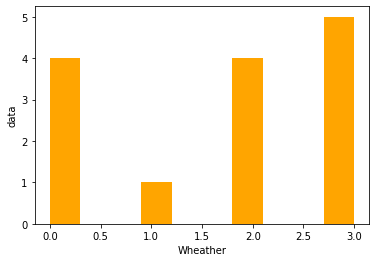

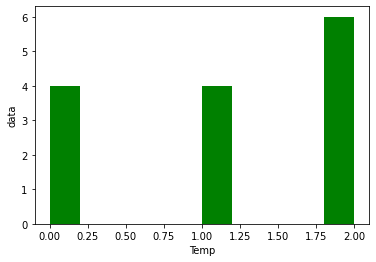

In [11]:
# Se genera un histograma para ver la distribución de los datos
# Histograma Wheather
plt.hist(data['wheather'], color="orange")
plt.xlabel("Wheather")
plt.ylabel("data")
plt.show()

# Histograma Temp
plt.hist(data['temp'], color="green")
plt.xlabel("Temp")
plt.ylabel("data")
plt.show()

#### Generamos el modelo de predicción usando el algoritmo Naive Bayes Classifier

In [12]:
# Se definen las características del modelo
features = ['wheather','temp']
X = data[features].values
# Se define la etiqueta del modelo
y = data['play'].values

# Se crea el clasificador de tipo Naive Bayes
nb = GaussianNB()

# Se entrena el modelo
nb.fit(X, y)

# Se genera la predicción para nublado y templado
prediction = nb.predict([[2, 2]])

# Si la salida es 1 se puede jugar, pero si la salida es 1 no se puede juegar
print("Valor predicción = ", prediction)

Valor predicción =  [1]


#### Aplicamos la separación del data set para pruebas y entrenamiento

In [13]:
# Se definen las características del modelo
features = ['wheather','temp']
X = data[features].values
# Se define la etiqueta del modelo
y = data['play'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state = 1)

#### Se entrena el modelo y se imprime el Accuracy

In [15]:
# Se crea el clasificador de tipo Naive Bayes
nb = GaussianNB()

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción para nublado y templado
prediction = nb.predict(X_test)

# Se genera el reporte de clasificación (Accuracy)
print("Accuracy: ", accuracy_score(y_test, prediction))

Accuracy:  0.5
